<a href="https://colab.research.google.com/github/Chen-Portfolio/Modeling-Purchase-Incidence-and-Price-Elasticity-of-Purchase-Probability-by-Logistic-Regression-/blob/main/Modeling_Purchase_Incidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: 500 Customers'Purchase Behavior data on a daily basis for two years (sevearl different observations can relate to the same customer)and demographical data in a grocery store. For each day, the dataset shows whether the individual visited the store and all the items they purchased and only focus on the purchases of chocolate candy bars. And, the dataset has been preprocessed by encoding the variables in order to transforming certain variables into categorical type.

# Import Libraries

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preparation

## Import Dataset

In [11]:
df_purchase = pd.read_csv('purchase data.csv')
df_purchase.isnull()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58691,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Import Segmentation Model

In [12]:
scaler = pickle.load(open('sc.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Feature Scaling

In [13]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_std 

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]])

## Apply PCA

In [14]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
df_purchase_segm_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

## Segment Data

In [15]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
purchase_segm_kmeans_pca

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## Create a copy of DataFrame

In [16]:
df_purchase_predictors = df_purchase.copy()

## Add segment labels

In [17]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)
df_purchase_predictors

df_pa = df_purchase_predictors
df_pa.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0


# Purchase Probility Model

In [18]:
# Dependent variable
Y = df_pa['Incidence']

In [19]:
# Independent variable -> Price is the most prominent feature -> choose 'mean price'for each row
X =  pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + df_pa['Price_2'] + df_pa['Price_3'] + df_pa['Price_4'] + df_pa['Price_5']) / 5
X.head()

,Mean_Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


In [20]:
model_purchase = LogisticRegression()
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model_purchase.coef_    # The resultl is "the change in purchase probility given a price"  
                        # negative result means a decrease in price would lead to an increase in purchase probility 
                        # The model quantifies the exact relationship betw.price and purchase probility

array([[-2.3480548]])

# Price Elasticity of Purchase Probability

##### # Price elasticity of purchase probility: % change in purchase probility in response to a 1% change in price.

##### # Check different values of the mean price and see how they affect the purchase probility.

In [22]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


##### # min:1.1, max:2.8 --> Expand this range in order to gain a better understanding of how the purchase probablilities and the respective elastic changes(0.5 to 3.5)

In [23]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range                             # the upper bound not included

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [24]:
price_range.shape

(300,)

In [25]:
df_price_range = pd.DataFrame(price_range)

In [26]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [27]:
Y_pr                            # Result are the class probabilities for the two classes 0(no purchase) and 1(purchase)
                                # For each row: 1st value-> the probability of no purchase, 2nd values -> the probability of purchase 

array([[0.08210697, 0.91789303],
       [0.08389404, 0.91610596],
       [0.08571638, 0.91428362],
       [0.08757452, 0.91242548],
       [0.089469  , 0.910531  ],
       [0.09140035, 0.90859965],
       [0.09336912, 0.90663088],
       [0.09537585, 0.90462415],
       [0.09742107, 0.90257893],
       [0.09950533, 0.90049467],
       [0.10162915, 0.89837085],
       [0.10379308, 0.89620692],
       [0.10599766, 0.89400234],
       [0.1082434 , 0.8917566 ],
       [0.11053083, 0.88946917],
       [0.11286049, 0.88713951],
       [0.11523289, 0.88476711],
       [0.11764855, 0.88235145],
       [0.12010797, 0.87989203],
       [0.12261166, 0.87738834],
       [0.12516012, 0.87483988],
       [0.12775383, 0.87224617],
       [0.13039328, 0.86960672],
       [0.13307895, 0.86692105],
       [0.13581129, 0.86418871],
       [0.13859076, 0.86140924],
       [0.14141781, 0.85858219],
       [0.14429286, 0.85570714],
       [0.14721634, 0.85278366],
       [0.15018866, 0.84981134],
       [0.

In [28]:
# Only interested in the probability of purchase
purchase_pr = Y_pr[:][:,1]

In [29]:
model_purchase.coef_[:, 0]

array([-2.3480548])

##### # Formula: E = beta * Price * ( 1 - Pr(purchase))

In [30]:
# An array containing the price elasticities at each price point

pe = model_purchase.coef_[:,0] * price_range * (1 - purchase_pr)

##### # Creat a DataFrame 

In [31]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [32]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: 'Price_Point'})
df_price_elasticities['Mean_Pe'] = pe
df_price_elasticities                 # For each row, we have the price and its corresponding price elasticity, they will help to determine the average customers' purchase behavior

,Price_Point,Mean_Pe
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442
...,...,...
295,3.45,-8.012897
296,3.46,-8.038147
297,3.47,-8.063363
298,3.48,-8.088544


In [33]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_Pe
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442
5,0.55,-0.118037
6,0.56,-0.122772
7,0.57,-0.127650
8,0.58,-0.132675
9,0.59,-0.137850


## Price Elasticity of Purchase Probility Model Result

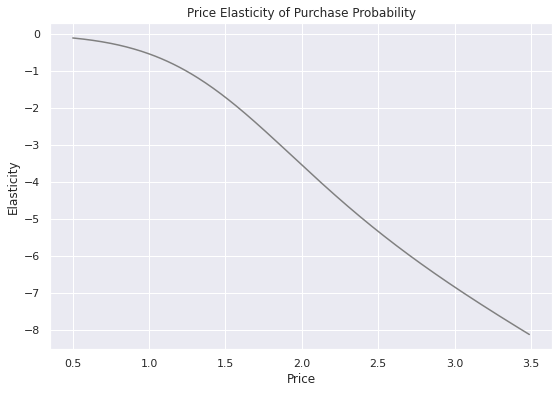

In [34]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()


# Price elasticity decreases as price increases 
# The decrease in price is slow in the range 0.5 to 1.1, and then it becomes steepe after 1.1
# Price elasticity are all negative 
# By definiton, elasticity measures the percent change in an outcome variable(purchase probability), if > 100% change -> purchase prob is elastic, < 100% chage -> inelastic
# |E|<1 inelastic,otherwise elastic
# eg.: price->1.10, elasticity->-0.69 -->means each increase in price by 1%, the prob of purchase will decrease by 0.69(inelastic)
# eg.: price->1.50, elasticity->-1.70 -->means an increase in price by 1%, the prob of purchase will decrease by 1.7(elastic)

##### # For inelastic values, the general recommendation is to increase the price as it wouldn't cause a significant decrease in purchase prob
##### # For elastic values, should decrease the price as it would cause significant increase in purchase prob.
##### # The turnin point in this case is price at 1.25 prob at -1.004606 --> price lower than 1.25, we can increase product price w/o losing too much purchase prob; for prices higher than 1.25, we have more to gain by reducing prices


## Purchase Probability by Segment

### Segment 1 - Career focused

In [35]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [36]:
Y = df_pa_segment_1['Incidence']

In [37]:
X = pd.DataFrame()

In [38]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [39]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model_incidence_segment_1.coef_

array([[-1.71206231]])

In [41]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

### Segment 1 - Results


In [42]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

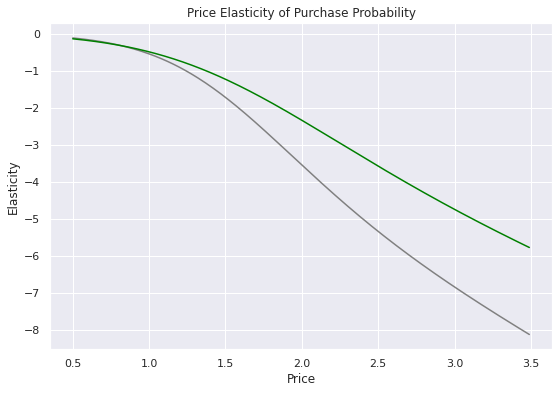

In [43]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()



# The purchase prob for Career focused segment is less than average.

### Segment 2 - Fewer Opportunites

In [44]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [45]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

### Segment 2 - Results


In [46]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

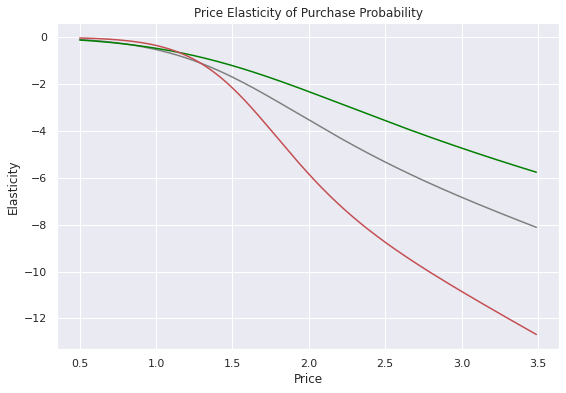

In [47]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()


# Fewer opportunities segment is more price sensitive compared to the average and a lot more than 'Career focused'

### Segment 0 - Standard

In [48]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

### Segment 3 - Well-off

In [49]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_Pe,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096396,-0.211378,-0.119009,-0.030909,-0.010577
1,0.51,-0.100464,-0.217955,-0.123190,-0.032676,-0.011182
2,0.52,-0.104659,-0.224640,-0.127464,-0.034529,-0.011816
3,0.53,-0.108984,-0.231434,-0.131832,-0.036472,-0.012481
4,0.54,-0.113442,-0.238337,-0.136297,-0.038511,-0.013179
5,0.55,-0.118037,-0.245351,-0.140860,-0.040648,-0.013910
6,0.56,-0.122772,-0.252475,-0.145522,-0.042889,-0.014677
7,0.57,-0.127650,-0.259711,-0.150284,-0.045238,-0.015481
8,0.58,-0.132675,-0.267060,-0.155149,-0.047699,-0.016323
9,0.59,-0.137850,-0.274521,-0.160117,-0.050278,-0.017205


### Segment Results

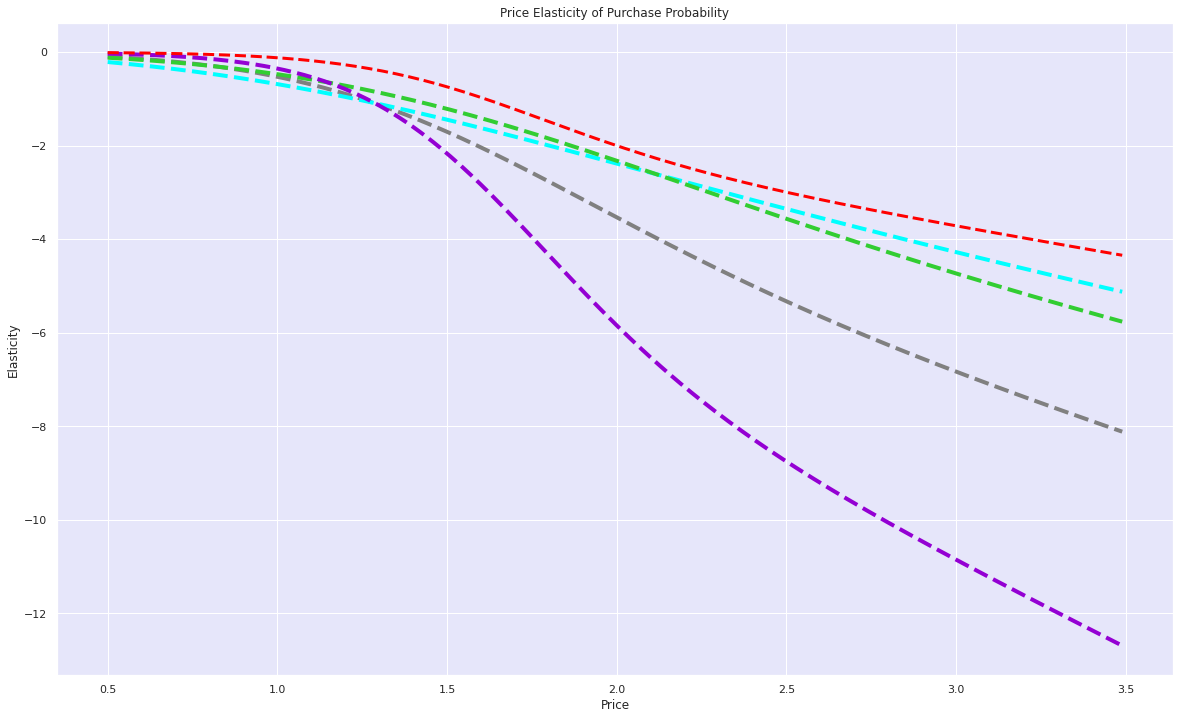

In [115]:
plt.figure(figsize = (20,12))
plt.plot(price_range, pe, color = 'grey', linestyle = '--', linewidth = 4 )
plt.plot(price_range, pe_segment0, color = 'cyan', ls = '--', linewidth = 4)
plt.plot(price_range, pe_segment_1, color = 'limegreen', ls = '--', linewidth = 4)
plt.plot(price_range, pe_segment2, color = 'darkviolet', ls = '--', linewidth = 4)
plt.plot(price_range, pe_segment3, color = 'red', ls = '--', linewidth = 3)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

ax = plt.gca()
ax.set_facecolor('lavender')

ax.grid(True)

plt.show()

## Purchase Probability with Promotion Feature

### Data Preparation

In [51]:
Y = df_pa['Incidence']

In [52]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [53]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5

In [54]:
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


### Model Estimation

In [55]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

# -1.49 -> Price, 0.56 -> Promotion

array([[-1.49384895,  0.56149785]])

### Price Elasticity with Promotion

#### Case 1: Promotional activities for all brands

In [56]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [57]:
df_price_elasticity_promotion['Promotion'] = 1
df_price_elasticity_promotion.head()

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1


In [58]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)
Y_promotion    # For each row: 1st value-> the probability of no purchase, 2nd values -> the probability of purchase 

array([[0.16832256, 0.83167744],
       [0.17042417, 0.82957583],
       [0.17254658, 0.82745342],
       [0.17468986, 0.82531014],
       [0.17685407, 0.82314593],
       [0.17903927, 0.82096073],
       [0.18124553, 0.81875447],
       [0.1834729 , 0.8165271 ],
       [0.18572143, 0.81427857],
       [0.18799118, 0.81200882],
       [0.19028218, 0.80971782],
       [0.19259449, 0.80740551],
       [0.19492812, 0.80507188],
       [0.19728312, 0.80271688],
       [0.19965952, 0.80034048],
       [0.20205734, 0.79794266],
       [0.2044766 , 0.7955234 ],
       [0.20691731, 0.79308269],
       [0.20937949, 0.79062051],
       [0.21186314, 0.78813686],
       [0.21436826, 0.78563174],
       [0.21689486, 0.78310514],
       [0.21944291, 0.78055709],
       [0.22201241, 0.77798759],
       [0.22460334, 0.77539666],
       [0.22721568, 0.77278432],
       [0.22984939, 0.77015061],
       [0.23250445, 0.76749555],
       [0.23518081, 0.76481919],
       [0.23787843, 0.76212157],
       [0.

In [59]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [60]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities.head()

,Price_Point,Mean_Pe,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096396,-0.211378,-0.119009,-0.030909,-0.010577,-0.125724
1,0.51,-0.100464,-0.217955,-0.123190,-0.032676,-0.011182,-0.129840
2,0.52,-0.104659,-0.224640,-0.127464,-0.034529,-0.011816,-0.134034
3,0.53,-0.108984,-0.231434,-0.131832,-0.036472,-0.012481,-0.138309
4,0.54,-0.113442,-0.238337,-0.136297,-0.038511,-0.013179,-0.142664


#### Case 2: Price Elasticity without Promotion

In [61]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [62]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [63]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [64]:
no_promo = Y_no_promo[: , 1]

In [65]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [66]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

In [67]:
df_price_elasticities.head()

,Price_Point,Mean_Pe,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096396,-0.211378,-0.119009,-0.030909,-0.010577,-0.125724,-0.195627
1,0.51,-0.100464,-0.217955,-0.123190,-0.032676,-0.011182,-0.129840,-0.201747
2,0.52,-0.104659,-0.224640,-0.127464,-0.034529,-0.011816,-0.134034,-0.207970
3,0.53,-0.108984,-0.231434,-0.131832,-0.036472,-0.012481,-0.138309,-0.214297
4,0.54,-0.113442,-0.238337,-0.136297,-0.038511,-0.013179,-0.142664,-0.220727


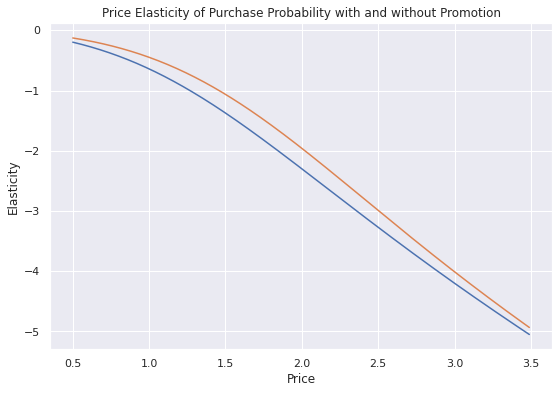

In [68]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.show()

# yellow: promotion blue: no
# Elasticity given max and min promotional activities
# Customers are less price sensitive to price changes when there are promotion acitivites


##### # Insights: It would be more beneficial to have a higher original price and constant promotion rahter than a lower original price